In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *
import statistics

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy/cross')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.1
learning_rate=1e-4
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_combined_train_test.csv', classes=['Suicide','Homicide'])




In [6]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


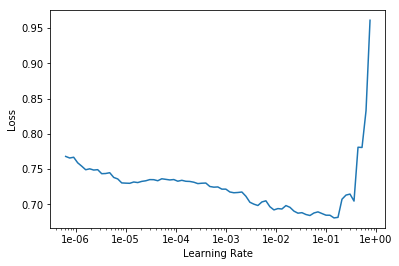

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:35
epoch  train_loss  valid_loss  accuracy
1      0.678661    0.552563    0.810811  (00:08)
2      0.628306    0.494465    0.814672  (00:09)
3      0.634217    0.540820    0.791506  (00:08)
4      0.588414    0.525042    0.795367  (00:09)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:24
epoch  train_loss  valid_loss  accuracy
1      0.572742    0.574940    0.772201  (00:21)
2      0.555880    0.525461    0.787645  (00:22)
3      0.527132    0.502050    0.806950  (00:24)
4      0.520057    0.458970    0.857143  (00:20)
5      0.473841    0.453997    0.841699  (00:21)
6      0.461589    0.408067    0.864865  (00:21)
7      0.462164    0.360013    0.872587  (00:19)
8      0.411267    0.354786    0.888031  (00:24)
9      0.395603    0.345441    0.884170  (00:23)
10     0.397686    0.305200    0.899614  (00:21)
11     0.436133    0.276781    0.884170  (00:18)
12     0.362561    0.311250    0.884170  (00:22)
13     0.328066    0.291929    0.891892  (00:24)
14     0.322092    0.276678    0.891892  (00:21)
15     0.309226    0.279570    0.891892  (00:23)
16     0.353465    0.367614    0.888031  (00:19)
17     0.283004    0.248132    0.880309  (00:23)
18     0.250778    0.292712    0.888031  (00:23)
19     0.253349    0.232534    0.899614  (00:22)
20     0.25

In [11]:
learn.validate()

[0.22729142, tensor(0.9035)]

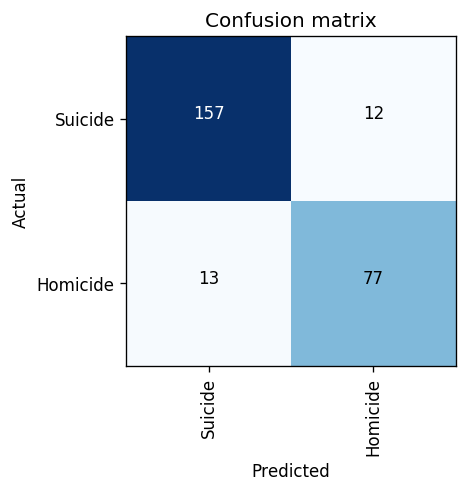

In [12]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

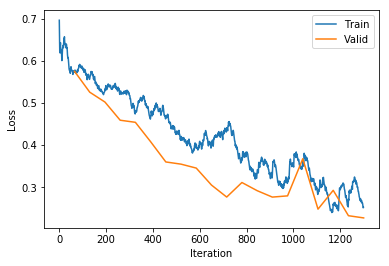

In [13]:
learn.recorder.plot_losses()

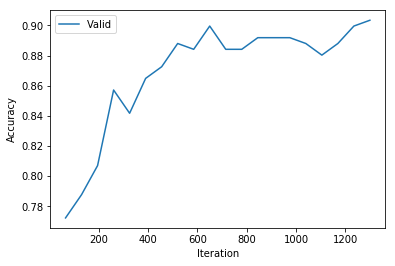

In [14]:
learn.recorder.plot_metrics()

In [15]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [16]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


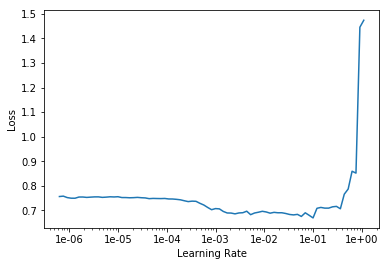

In [17]:
learn.recorder.plot()

In [18]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:33
epoch  train_loss  valid_loss  accuracy
1      0.665095    0.618766    0.633205  (00:09)
2      0.669953    0.525644    0.806950  (00:07)
3      0.644196    0.548900    0.768340  (00:08)
4      0.615834    0.524218    0.803089  (00:08)



In [19]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:28
epoch  train_loss  valid_loss  accuracy
1      0.561536    0.486656    0.806950  (00:24)
2      0.567024    0.448149    0.833977  (00:20)
3      0.530567    0.411945    0.837838  (00:23)
4      0.511285    0.523344    0.776062  (00:22)
5      0.460670    0.412835    0.849421  (00:24)
6      0.440663    0.355957    0.891892  (00:23)
7      0.440683    0.337272    0.884170  (00:21)
8      0.386880    0.306562    0.876448  (00:24)
9      0.392432    0.308551    0.888031  (00:24)
10     0.423350    0.303945    0.888031  (00:20)
11     0.346604    0.295595    0.888031  (00:23)
12     0.361058    0.257751    0.891892  (00:21)
13     0.332242    0.301279    0.899614  (00:20)
14     0.316736    0.292824    0.895753  (00:24)
15     0.346735    0.293094    0.895753  (00:20)
16     0.351803    0.287216    0.895753  (00:18)
17     0.344148    0.296839    0.891892  (00:20)
18     0.280980    0.271520    0.895753  (00:24)
19     0.267943    0.231171    0.899614  (00:23)
20     0.28

In [20]:
learn.validate()

[0.26341248, tensor(0.8958)]

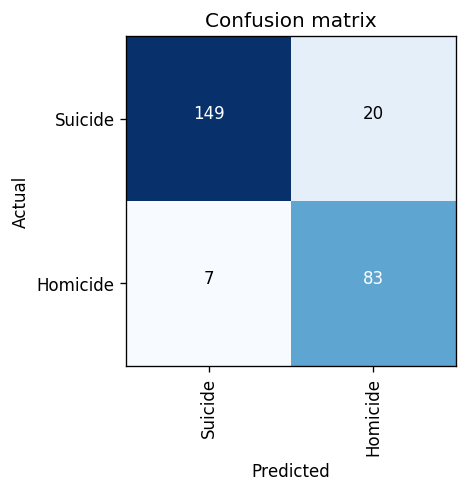

In [21]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

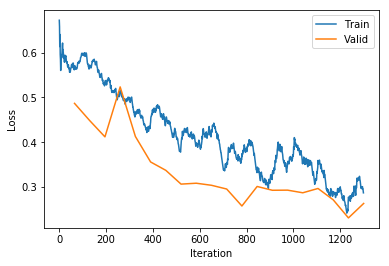

In [22]:
learn.recorder.plot_losses()

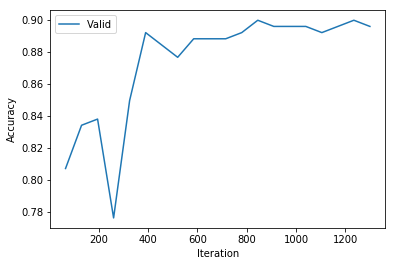

In [23]:
learn.recorder.plot_metrics()

In [24]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [25]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


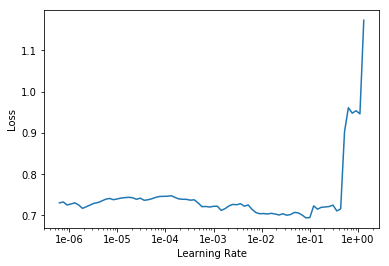

In [26]:
learn.recorder.plot()

In [27]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:30
epoch  train_loss  valid_loss  accuracy
1      0.709658    0.650298    0.579151  (00:08)
2      0.692478    0.584676    0.722008  (00:07)
3      0.657869    0.578821    0.749035  (00:07)
4      0.658463    0.550972    0.737452  (00:07)



In [28]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:15
epoch  train_loss  valid_loss  accuracy
1      0.617809    0.531158    0.779923  (00:21)
2      0.604652    0.509554    0.830116  (00:20)
3      0.599965    0.475716    0.841699  (00:18)
4      0.530242    0.516581    0.779923  (00:23)
5      0.513312    0.455393    0.837838  (00:21)
6      0.542014    0.433708    0.837838  (00:18)
7      0.466203    0.380566    0.868726  (00:24)
8      0.417431    0.377235    0.876448  (00:23)
9      0.401183    0.339751    0.888031  (00:23)
10     0.455280    0.442891    0.830116  (00:18)
11     0.405165    0.351678    0.888031  (00:22)
12     0.417383    0.348204    0.872587  (00:18)
13     0.400682    0.317923    0.880309  (00:20)
14     0.314755    0.282157    0.895753  (00:24)
15     0.326186    0.315062    0.880309  (00:21)
16     0.305688    0.261719    0.895753  (00:23)
17     0.308515    0.235450    0.903475  (00:22)
18     0.261503    0.271366    0.888031  (00:23)
19     0.249435    0.266651    0.891892  (00:24)
20     0.33

In [29]:
learn.validate()

[0.26029575, tensor(0.8919)]

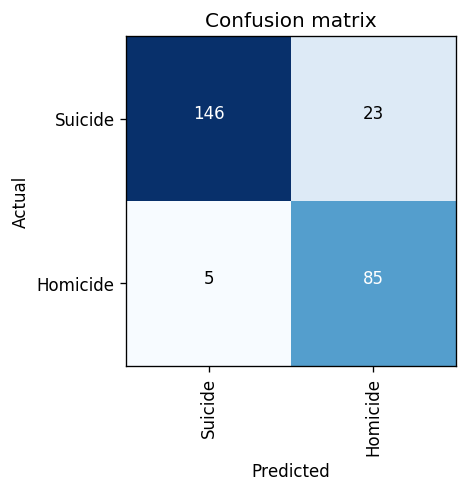

In [30]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

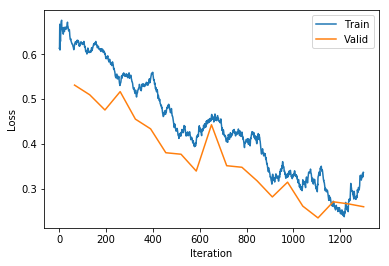

In [31]:
learn.recorder.plot_losses()

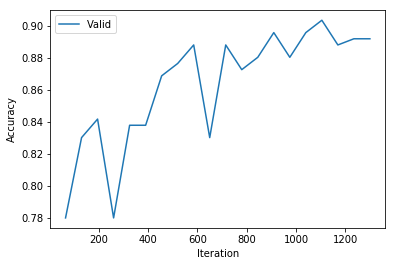

In [32]:
learn.recorder.plot_metrics()

In [33]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [34]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


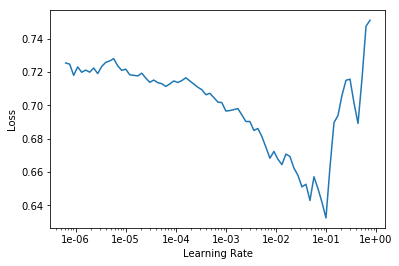

In [35]:
learn.recorder.plot()

In [36]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:34
epoch  train_loss  valid_loss  accuracy
1      0.636785    0.589155    0.772201  (00:08)
2      0.629723    0.555758    0.764479  (00:07)
3      0.606190    0.566534    0.745174  (00:08)
4      0.551942    0.530556    0.772201  (00:09)



In [37]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:09
epoch  train_loss  valid_loss  accuracy
1      0.556076    0.540773    0.768340  (00:23)
2      0.522642    0.494773    0.799228  (00:23)
3      0.562090    0.437466    0.830116  (00:19)
4      0.497878    0.488015    0.814672  (00:22)
5      0.466517    0.514369    0.803089  (00:22)
6      0.490865    0.452906    0.837838  (00:18)
7      0.450773    0.413732    0.861004  (00:23)
8      0.426309    0.419858    0.849421  (00:22)
9      0.396474    0.378055    0.872587  (00:22)
10     0.395569    0.413363    0.861004  (00:20)
11     0.343788    0.334003    0.864865  (00:24)
12     0.371051    0.341351    0.872587  (00:19)
13     0.333137    0.326774    0.872587  (00:21)
14     0.365537    0.319059    0.864865  (00:19)
15     0.291071    0.332262    0.868726  (00:21)
16     0.370084    0.287237    0.876448  (00:19)
17     0.296388    0.398636    0.880309  (00:24)
18     0.328805    0.294332    0.888031  (00:19)
19     0.314501    0.311183    0.880309  (00:20)
20     0.31

In [38]:
learn.validate()

[0.2920536, tensor(0.8803)]

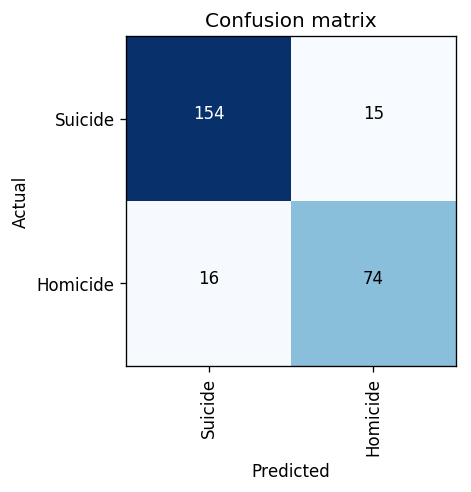

In [39]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

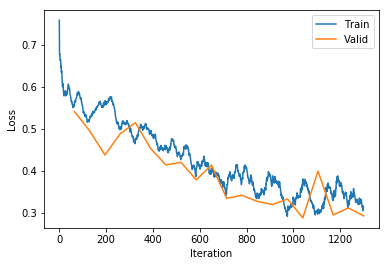

In [40]:
learn.recorder.plot_losses()

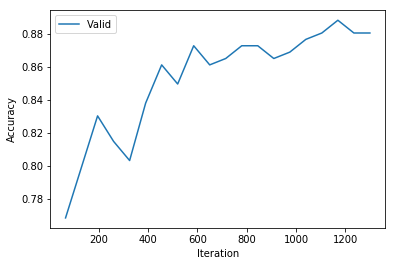

In [41]:
learn.recorder.plot_metrics()

In [42]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult)
learn.load_encoder('enc_autopsy_pretrained')

learn.freeze()

In [43]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


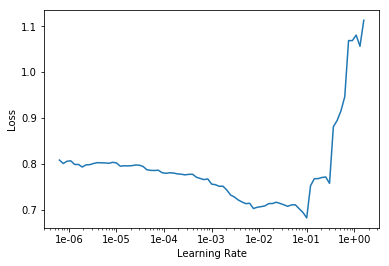

In [44]:
learn.recorder.plot()

In [45]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:36
epoch  train_loss  valid_loss  accuracy
1      0.725740    0.623336    0.722008  (00:08)
2      0.655262    0.599303    0.718147  (00:09)
3      0.608402    0.569253    0.776062  (00:09)
4      0.604708    0.543007    0.776062  (00:09)



In [46]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 07:26
epoch  train_loss  valid_loss  accuracy
1      0.552396    0.560552    0.760618  (00:23)
2      0.579954    0.561764    0.768340  (00:19)
3      0.524817    0.478263    0.849421  (00:24)
4      0.496741    0.452810    0.849421  (00:23)
5      0.446647    0.381350    0.864865  (00:25)
6      0.433606    0.422868    0.841699  (00:23)
7      0.439033    0.338967    0.899614  (00:21)
8      0.411612    0.350873    0.868726  (00:22)
9      0.390055    0.321759    0.888031  (00:21)
10     0.417703    0.293484    0.891892  (00:19)
11     0.366513    0.266010    0.903475  (00:22)
12     0.385120    0.239294    0.915058  (00:20)
13     0.335754    0.333803    0.876448  (00:24)
14     0.277900    0.261970    0.888031  (00:25)
15     0.368251    0.331424    0.884170  (00:18)
16     0.367680    0.269908    0.899614  (00:19)
17     0.299602    0.236615    0.911197  (00:23)
18     0.305320    0.231445    0.899614  (00:22)
19     0.304315    0.249558    0.895753  (00:20)
20     0.24

In [47]:
learn.validate()

[0.22776726, tensor(0.9035)]

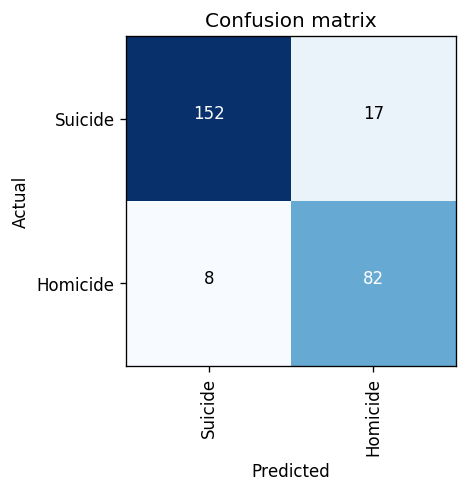

In [48]:
accuracy_list.append(learn.validate()[1].item())
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

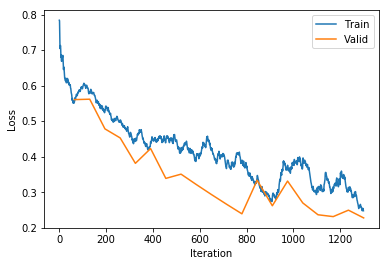

In [49]:
learn.recorder.plot_losses()

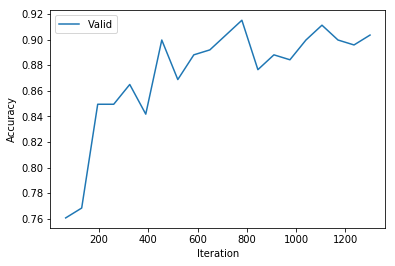

In [50]:
learn.recorder.plot_metrics()

In [51]:
print(accuracy_list)

[0.9034749269485474, 0.8957529067993164, 0.8918918967247009, 0.8803088665008545, 0.9034749269485474]


In [52]:
print(sum(accuracy_list)/len(accuracy_list))

0.8949807047843933


In [53]:
print(statistics.variance(accuracy_list))

9.24258725369498e-05


In [54]:
import torch

torch.cuda.empty_cache()